In [84]:
import os
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [85]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [86]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [87]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [88]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [89]:
string_col=df.select_dtypes(include=['object']).columns
df[string_col]=df[string_col].astype('string')

In [90]:
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [91]:
string_col=df.select_dtypes(include=['string']).columns.to_list()

In [92]:
print(string_col)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [93]:
num_col=df.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove('HeartDisease')


In [94]:
print(num_col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [96]:
df_copy=df.copy(deep=True)
df_copy.drop(['Sex','ExerciseAngina','RestingECG','ST_Slope','ChestPainType'],axis=1,inplace=True)

In [97]:
px.imshow(df_copy.corr(),title='Correlation Heatmap between numerical variables and target variable',)

In [98]:
fig=px.histogram(df,x='HeartDisease',color='Sex',hover_data=df_copy.columns,title='Distribution w.rt sex',barmode='group')
fig.show()

In [99]:
fig=px.histogram(df,x='ChestPainType',color='Sex',hover_data=df_copy.columns,title='Distribution w.rt Chest Pain Type')
fig.show()

In [100]:
fig=px.histogram(df,x='RestingECG',hover_data=df_copy.columns,title='Distribution w.rt Resting ECG')
fig.show()

In [101]:
fig=px.histogram(df,x='Sex',hover_data=df_copy.columns,title='Sex Distribution')
fig.show()

To plot multivariate distributions we use pairplot.<br>
Its used only with numerical variables

[]

<Figure size 1200x1000 with 0 Axes>

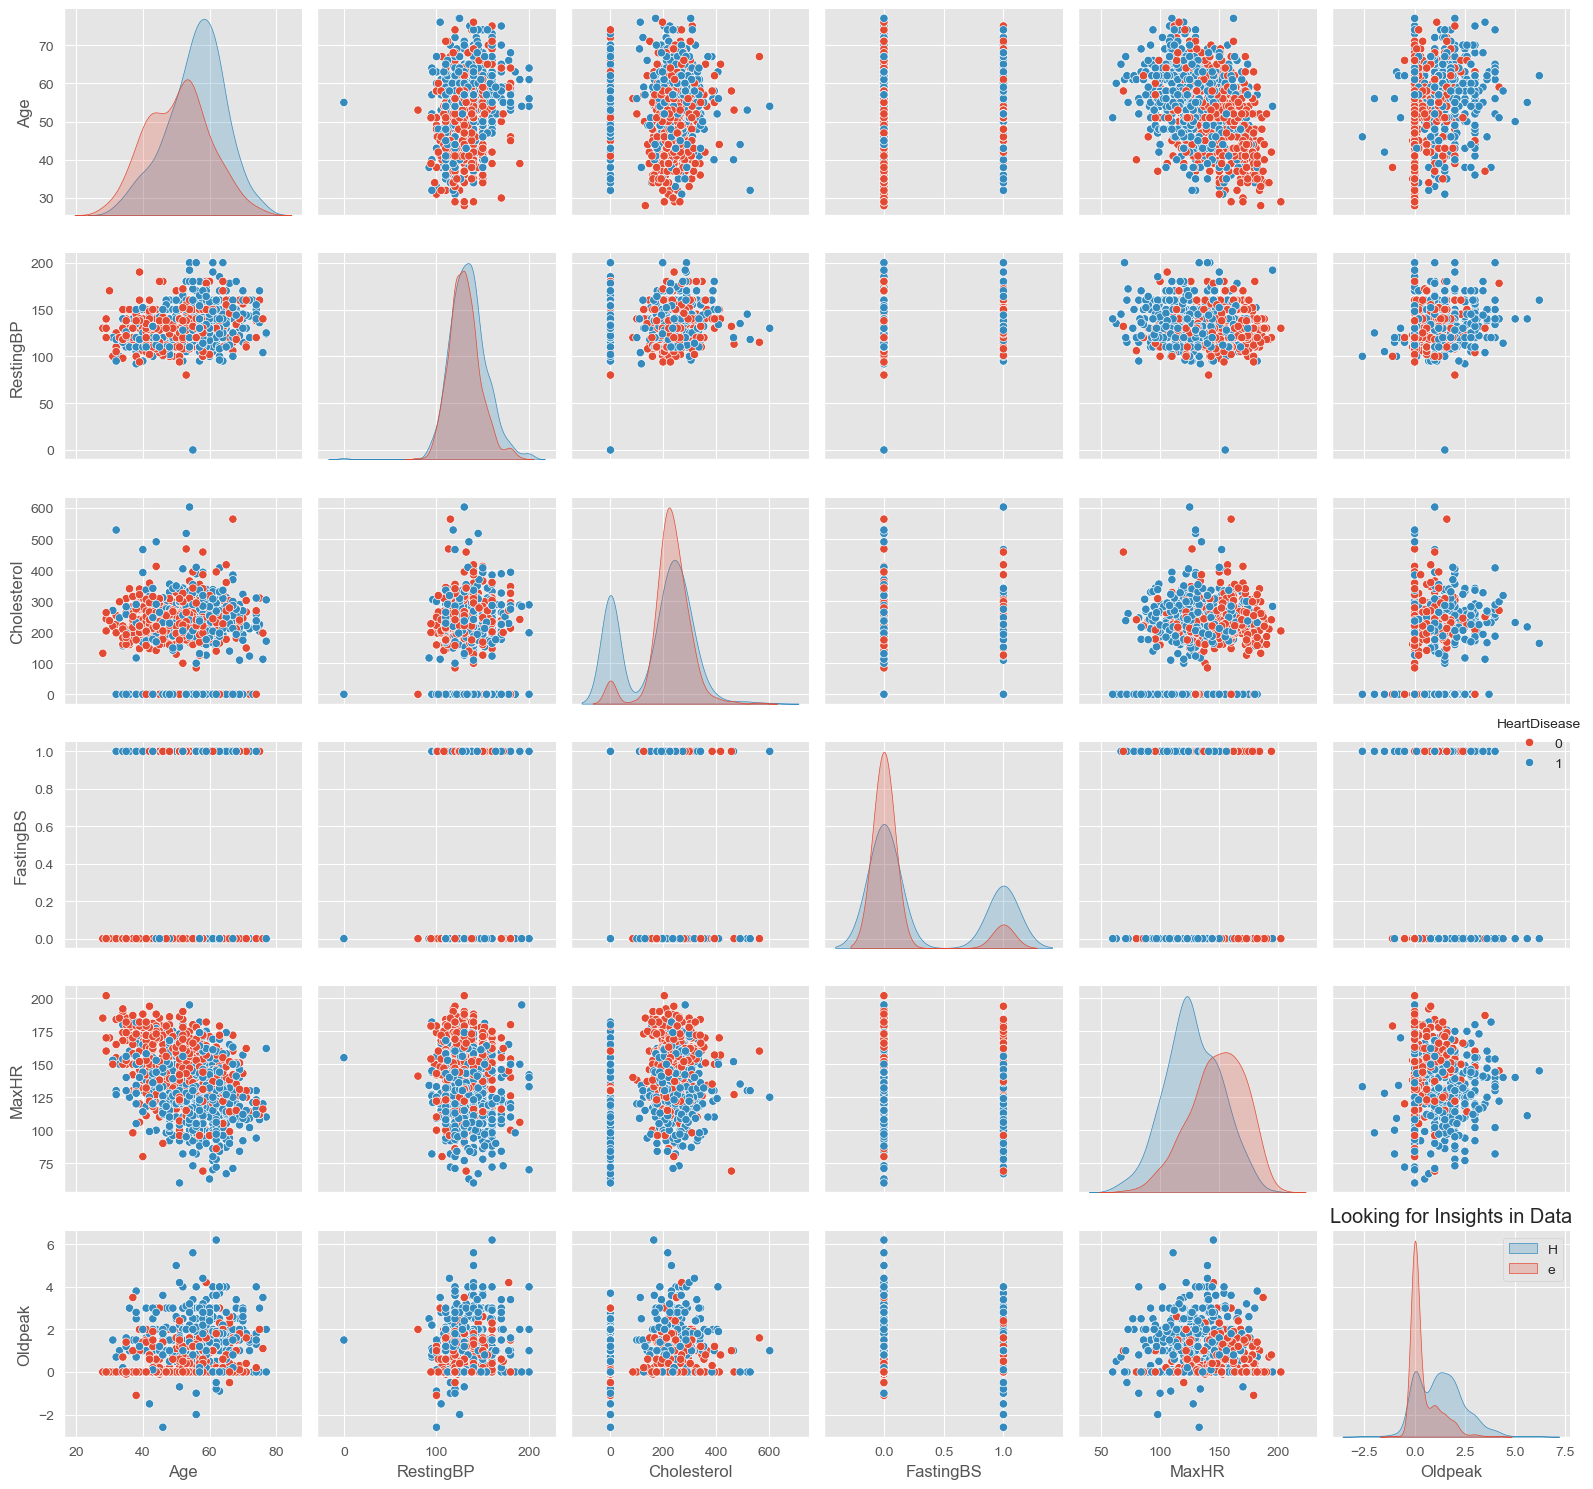

In [102]:
plt.figure(figsize=(12,10))
sns.pairplot(df_copy,hue='HeartDisease')
plt.title('Looking for Insights in Data')
plt.tight_layout()
plt.legend('Heart Disease')
plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [103]:
df_copy.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

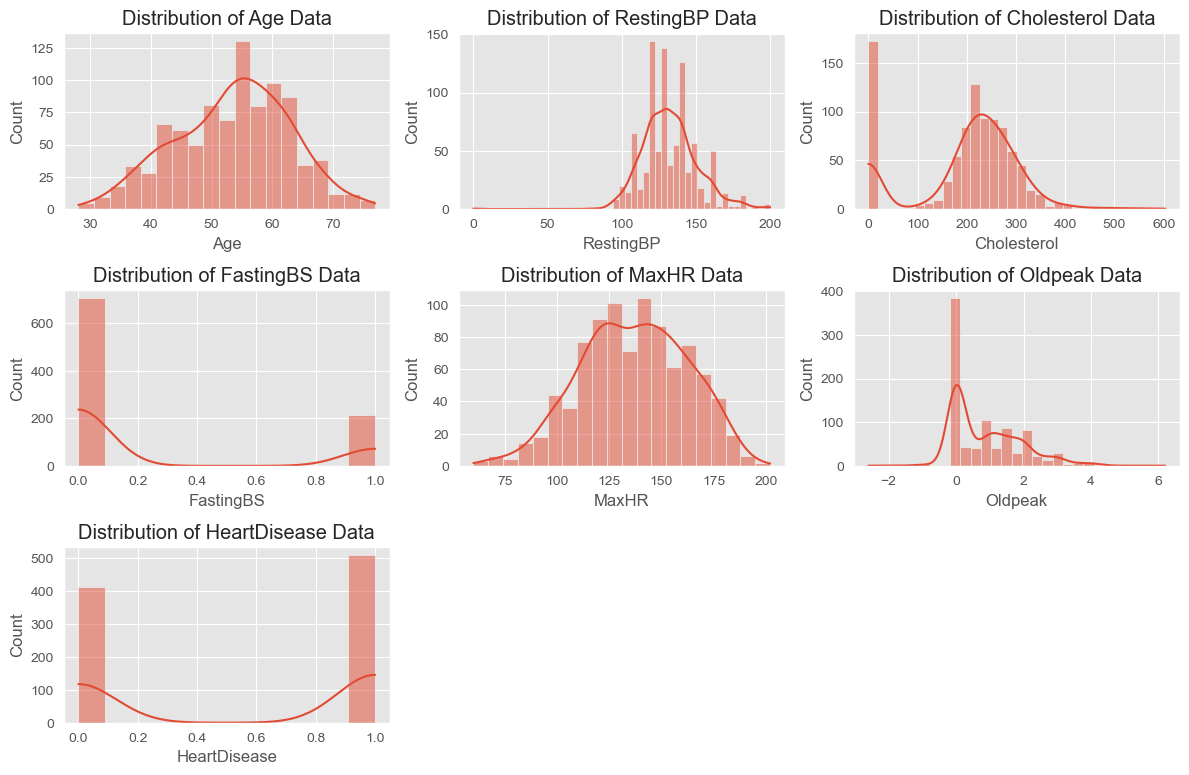

In [104]:
plt.figure(figsize=(12,10))
for i,col in enumerate(df_copy.columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(df_copy[col],kde=True)
    plt.tight_layout()
    plt.plot()



Outliers

In [105]:
#Distribitution of Age
fig=px.box(df,y='Age',x='HeartDisease',title='Age Distribution')
fig.show()


In [106]:
fig=px.box(df,x='HeartDisease',y='Cholesterol',title='Cholesterol Distribution')
fig.show()

In [107]:
fig=px.box(df_copy,x='HeartDisease',y='RestingBP',title='RestingECG Distribution')
fig.show()

Data Preprocessing

In [108]:
#Dummy Simple Imputation not related to this dataset
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='median')
#imputer=imputer.fit(df[['weight']])
#df['weight']=imputer.transform([['weight']])


Encoding Categorical Data

In [109]:
from sklearn.preprocessing import LabelEncoder



Distribution of Categorical Variables

In [110]:
for col in string_col:
    print(f'The distribution of categorical values in {col} are')
    print(df[col].value_counts())

The distribution of categorical values in Sex are
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical values in ChestPainType are
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical values in RestingECG are
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical values in ExerciseAngina are
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical values in ST_Slope are
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [111]:
df_tree=df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [112]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=True,dtype=int)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [113]:
target='HeartDisease'
y=df_nontree[target].values
df_nontree.drop(target,axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1,0
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1,0


In [114]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [115]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]
from sklearn.naive_bayes import GaussianNB

In [116]:
kf=StratifiedKFold(n_splits=5)
for fold,(trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f'The fold is :{fold}')
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass



The fold is :0
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is :1
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is :2
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83    

In [117]:
acc_GB=[]
kf=StratifiedKFold(n_splits=5)
for fold,(trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f'The fold is :{fold}')
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_GB.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass






The fold is :0
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        82
           1       0.93      0.81      0.87       102

    accuracy                           0.86       184
   macro avg       0.87      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for Fold 1 : 0.8702773792443808
The fold is :1
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        82
           1       0.94      0.85      0.89       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

The accuracy for Fold 2 : 0.8898852223816357
The fold is :2
              precision    recall  f1-score   support

           0       1.00      0.63      0.78        82
           1       0.77      1.00      0.87       102

    accuracy                           0.84    

In [118]:
from sklearn.svm import SVC

In [119]:
acc_SVM=[]
kf=StratifiedKFold(n_splits=5)
for fold,(trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    svm=SVC(kernel='linear')
    svm.fit(X_train,y_train)
    y_pred=svm.predict(X_valid)
    print(f'The fold is :{fold}')
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_SVM.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass



The fold is :0
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for Fold 1 : 0.8690817790530847
The fold is :1
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.92      0.79      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8543758967001435
The fold is :2
              precision    recall  f1-score   support

           0       0.95      0.65      0.77        82
           1       0.77      0.97      0.86       102

    accuracy                           0.83    

In [120]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=StratifiedKFold(n_splits=5)
for fold,(trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_pred=svm.predict(X_valid)
    print(f'The fold is :{fold}')
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass




The fold is :0
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        82
           1       0.92      0.91      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

The accuracy for Fold 1 : 0.9071018651362983
The fold is :1
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        82
           1       0.94      0.97      0.96       102

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184

The accuracy for Fold 2 : 0.9487087517934004
The fold is :2
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        82
           1       0.82      0.92      0.87       102

    accuracy                           0.84    

Tree Based Models


In [121]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)
from sklearn.tree import DecisionTreeClassifier

In [122]:
acc_Dtree=[]
kf=StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        82
           1       0.84      0.64      0.73       102

    accuracy                           0.73       184
   macro avg       0.75      0.75      0.73       184
weighted avg       0.76      0.73      0.73       184

The accuracy for 1 : 0.745456719273075
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        82
           1       0.87      0.64      0.73       102

    accuracy                           0.74       184
   macro avg       0.76      0.76      0.74       184
weighted avg       0.77      0.74      0.74       184

The accuracy for 2 : 0.7576518412242945
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        82
           1       0.75      0.92      0.83       102

    accuracy                           0.79   

In [123]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.62      0.76        82
           1       0.77      0.99      0.86       102

    accuracy                           0.83   